In [8]:
!pip3 install ucimlrepo matplotlib numpy pandas scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.8 MB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 19.9 MB/s eta 0:00:01
     |████████████████████████████████| 107 kB 33.3 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 19.4 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 11.3 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 41.7 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from ucimlrepo import fetch_ucirepo


In [165]:
# Fetch the dataset
df = fetch_ucirepo(id=571)

X = df.data.features

X = X.drop(columns=["Age", "Sex"])
X = SimpleImputer(strategy="mean").fit_transform(X)

In [166]:
targets = df.data.targets.apply(lambda x: x[0][0], axis=1).astype(int)

/var/folders/x4/rgy52z9s3j9bmgmg0yqm04pr0000gn/T/ipykernel_41832/21802868.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  targets = df.data.targets.apply(lambda x: x[0][0], axis=1).astype(int)


Text(0.5, 1.0, 'True Labels')

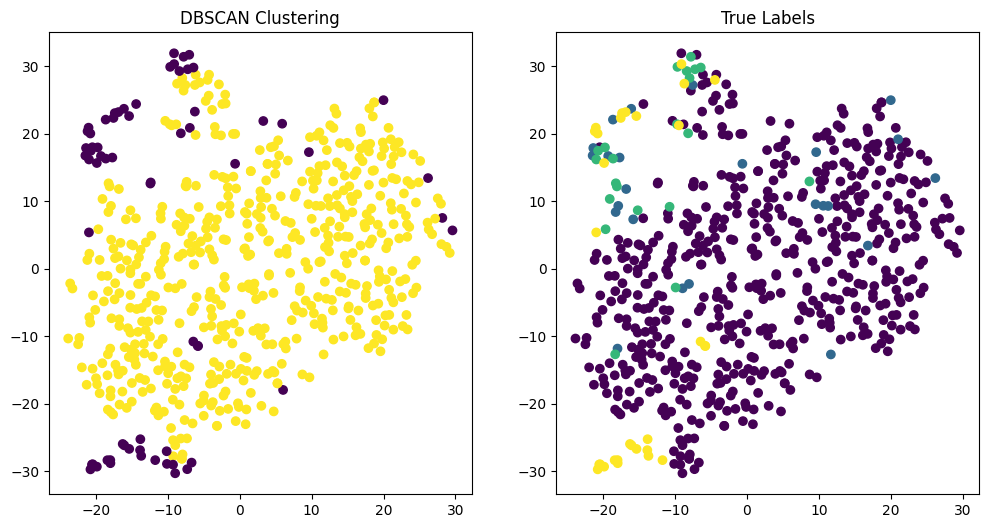

In [169]:
# Preprocess the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Build a DBSCAN model
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan.fit(X)

# Reduce the data to 2D
pca = TSNE(n_components=2)
x_tsne = pca.fit_transform(X)

# Plot the data with clusters as colors
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.scatter(x_tsne[:, 0], x_tsne[:, 1], c=dbscan.labels_)
ax1.set_title("DBSCAN Clustering")

ax2.scatter(x_tsne[:, 0], x_tsne[:, 1], c=targets)
ax2.set_title("True Labels")
